**Age Detection of Indian Actors using tensorflow 2.0 and keras** 

# Importing important  libraries





In [0]:
import shutil, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preaparation

In [0]:


#---- Reading file
train_csv = pd.read_csv("train.csv")
train_csv["Class"].unique()

#--- Separating images in 3 classes

for index, row in train_csv.iterrows():
    print(row["ID"] + row["Class"])
    shutil.copy2("Train/"+row["ID"],row["Class"] )
    
for i in range(200):
    


#----preparing validation set    
    
for img in     os.listdir("MIDDLE")[:200]:
    shutil.copy2("MIDDLE/"+img,"validation_set/MIDDLE" )
    os.remove("MIDDLE/"+img)
    
    
for img in     os.listdir("YOUNG")[:200]:
    shutil.copy2("YOUNG/"+img,"validation_set/YOUNG" )
    os.remove("YOUNG/"+img)


for img in     os.listdir("OLD")[:200]:
    shutil.copy2("OLD/"+img,"validation_set/OLD" )
    os.remove("OLD/"+img)
    

# Steps of convolutional neural networks:

**Convolution Operation ----> Pooling ------> Flattening -----> Full Connection**
              

![alt text](https://raw.githubusercontent.com/sujitkoley9/Image-Classification/master/CNN-1.jpg)


![alt text](https://raw.githubusercontent.com/sujitkoley9/Image-Classification/master/CNN-2.png)

**Step 1 - Convolution**



In [0]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Dropout
classifier.add(Dropout(0.25))

**Step 2 - Pooling**

In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

**Step 3 -Adding a second convolutional layer**

In [0]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout
classifier.add(Dropout(0.25))

**Step 4 - Flattening**

In [0]:
classifier.add(Flatten())

**Step 5 - Full connection**

In [0]:
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(3, activation = 'sigmoid'))

In [14]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
__________

**Step 6 -Compiling the CNN**

**Different type of optimizers are:**


1.   sgd (stochastic gradient descent)
2.   rmsprop (root mean square propagation) 

1.   Adams
2.   Adagrad

1.   Adadelta


















```



In [0]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


**Step 7: Image augmentation**

***Explanation:***
batch_size=32 means  -- per step 32 images will be generated randomly


In [17]:
# Batch size
batch_size=32

# To handle image loading problem
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('dataset/validation_set',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

print(training_set.class_indices)

Found 19306 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
{'MIDDLE': 0, 'OLD': 1, 'YOUNG': 2}


**Step 8 - Fitting the CNN to the images**

***Explanation:***
Epochs = 64 and steps_per_epoch=100 means ---we want to go over our training data 64 times and each time we will make gradient updates 100 times with different data.





In [18]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = len(validation_set))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
604/604 [==============================] - 56s 93ms/step - loss: 0.8567 - acc: 0.6014 - val_loss: 0.9959 - val_acc: 0.4800
Epoch 2/20
604/604 [==============================] - 53s 87ms/step - loss: 0.7647 - acc: 0.6695 - val_loss: 0.9830 - val_acc: 0.4483
Epoch 3/20
604/604 [==============================] - 52s 87ms/step - loss: 0.7273 - acc: 0.6862 - val_loss: 0.9215 - val_acc: 0.5217
Epoch 4/20
604/604 [==============================] - 52s 87ms/step - loss: 0.6981 - acc: 0.6992 - val_loss: 0.8542 - val_acc: 0.5250
Epoch 5/20
604/604 [==============================] - 52s 86ms/step - loss: 0.6774 - acc: 0.7066 - val_loss: 0.8846 - val_acc: 0.5083
Epoch 6/20
604/604 [==============================] - 52s 86ms/step - loss: 0.6584 - acc: 0.7144 - val_loss: 0.8079 - val_acc: 0.5700
Epoch 7/20
604/604 [==============================] - 52s 87ms/step - loss: 0.6392 - acc: 0.7213 - val_loss: 0.8030 - val_acc: 0.5633
Epoch 8/20
604

**Visual display of accuaracy and loss of model**

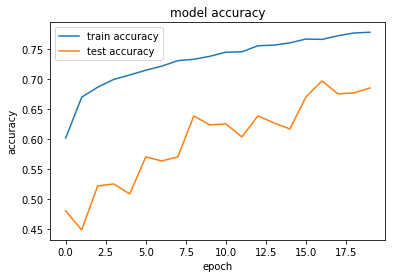

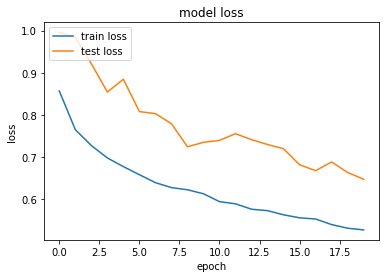

In [21]:
# summarize history for accuracy
epoch = range(len(history.history['acc']))
plt.plot(epoch,history.history['acc'],label="train accuracy")
plt.plot(epoch,history.history['val_acc'],label="test accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()
# summarize history for loss
plt.plot(epoch,history.history['loss'],label="train loss")
plt.plot(epoch,history.history['val_loss'],label="test loss" )
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

  **Prediction on unknown image**

In [0]:
image_list=[]

image_names_test = os.listdir("dataset/Test")

for img in image_names_test:
    img_load = image.load_img("dataset/Test/" +img, target_size = (64, 64))
    img_array = image.img_to_array(img_load)
    image_list.append(img_array)
 

test_image_array =  np.array(image_list)
  


In [0]:
Predicted_list = classifier.predict_classes(test_image_array).tolist()

def coversion(x):
  if x==0:
    return "MIDDLE"
  elif x==1:
    return "OLD"
  else:
    return "YOUNG"

Predicted_list = list(map( lambda x: coversion(x),Predicted_list))  

  

In [0]:
submission_df = pd.DataFrame({ "ID": image_names_test,
                               "Class":Predicted_list
      
                             })
submission_df.to_csv("output.csv", index=False)

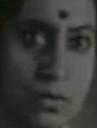

In [55]:
from IPython.display import Image,display,HTML

display(HTML('<h1> Age is  ' +str(Predicted_list[10]) +  ' </h1>'))
display(Image(filename="dataset/Test/"+image_names_test[10],width=70, height=70))

display(HTML('<h1> Age is  ' + str(Predicted_list[50]) +  ' </h1>'))
display(Image(filename="dataset/Test/"+image_names_test[50],width=70, height=70))


